<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/marketing-analytics/Salinan_NDCS_coba_Shopee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**1. Analisis data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/marketing-analytics/'
train = pd.read_csv(url + "train.csv")
test = pd.read_csv(url + "test.csv")
users = pd.read_csv(url + "users.csv")

####**1.1 Liat satu-satu datanya**

**Tips:** Liatnya pake transpose `(.T)` biar kolomnya pindah ke baris jadi keliatan langsung semua kolomnya.

In [3]:
train.head().T

,0,1,2,3,4
country_code,4,4,6,1,6
grass_date,2019-07-16 00:00:00+08:00,2019-07-16 00:00:00+08:00,2019-07-16 00:00:00+08:00,2019-07-16 00:00:00+08:00,2019-07-16 00:00:00+08:00
user_id,43,102,177,184,221
subject_line_length,44,44,49,49,49
last_open_day,19,9,14,49,227
last_login_day,6,4,5,9,6
last_checkout_day,18,8,5,53,221
open_count_last_10_days,0,2,0,0,0
open_count_last_30_days,2,9,4,0,0
open_count_last_60_days,4,17,12,1,0


In [4]:
test.head().T

,0,1,2,3,4
country_code,6,6,5,1,5
grass_date,2019-09-03 00:00:00+08:00,2019-09-03 00:00:00+08:00,2019-09-03 00:00:00+08:00,2019-09-03 00:00:00+08:00,2019-09-03 00:00:00+08:00
user_id,0,130,150,181,192
subject_line_length,35,35,25,36,23
last_open_day,27,7,34,63,6
last_login_day,2,5,1,5,5
last_checkout_day,13,383,3,5,54
open_count_last_10_days,2,1,0,0,0
open_count_last_30_days,3,1,0,0,0
open_count_last_60_days,4,1,0,0,0


In [5]:
users.head().T

,0,1,2,3,4
user_id,0,1,2,3,4
attr_1,NaN,1,NaN,NaN,1
attr_2,1,1,1,1,1
attr_3,0,2,0,0,2
age,NaN,50,NaN,NaN,33
domain,@gmail.com,@gmail.com,other,@gmail.com,@gmail.com


####**1.2 Bikin summary**

In [6]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [7]:
dataset_summary(train)

Dataset dimension : (73539, 18)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,country_code,int64,0,0.0,7,0.009519
1,grass_date,object,0,0.0,47,0.063912
2,user_id,int64,0,0.0,72845,99.056283
3,subject_line_length,int64,0,0.0,56,0.076150
4,last_open_day,object,0,0.0,549,0.746543
5,last_login_day,object,0,0.0,893,1.214322
6,last_checkout_day,object,0,0.0,947,1.287752
7,open_count_last_10_days,int64,0,0.0,20,0.027196
8,open_count_last_30_days,int64,0,0.0,46,0.062552
9,open_count_last_60_days,int64,0,0.0,76,0.103347


In [8]:
dataset_summary(test)

Dataset dimension : (55970, 17)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,country_code,int64,0,0.0,7,0.012507
1,grass_date,object,0,0.0,26,0.046453
2,user_id,int64,0,0.0,55970,100.000000
3,subject_line_length,int64,0,0.0,62,0.110774
4,last_open_day,object,0,0.0,491,0.877256
5,last_login_day,object,0,0.0,829,1.481151
6,last_checkout_day,object,0,0.0,898,1.604431
7,open_count_last_10_days,int64,0,0.0,21,0.037520
8,open_count_last_30_days,int64,0,0.0,41,0.073254
9,open_count_last_60_days,int64,0,0.0,77,0.137574


In [9]:
dataset_summary(users)

Dataset dimension : (127886, 6)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,user_id,int64,0,0.000000,127886,100.000000
1,attr_1,float64,48899,38.236398,2,0.001564
2,attr_2,float64,447,0.349530,2,0.001564
3,attr_3,float64,0,0.000000,5,0.003910
4,age,float64,48899,38.236398,106,0.082886
5,domain,object,0,0.000000,11,0.008601


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
country_code,73539.0,2.533159,1.675251,1.0,1.0,2.0,3.0,7.0
user_id,73539.0,63048.595358,36068.006037,2.0,31679.5,63340.0,94731.5,127925.0
subject_line_length,73539.0,43.656373,11.219323,10.0,34.0,43.0,52.0,75.0
open_count_last_10_days,73539.0,0.911829,1.754052,0.0,0.0,0.0,1.0,31.0
open_count_last_30_days,73539.0,2.780457,4.570239,0.0,0.0,1.0,3.0,92.0
open_count_last_60_days,73539.0,5.019364,7.902313,0.0,0.0,2.0,6.0,135.0
login_count_last_10_days,73539.0,8.382287,13.424436,0.0,0.0,3.0,12.0,254.0
login_count_last_30_days,73539.0,25.284053,37.853189,0.0,1.0,11.0,35.0,735.0
login_count_last_60_days,73539.0,49.010430,71.819327,0.0,3.0,22.0,69.0,1260.0
checkout_count_last_10_days,73539.0,0.909898,2.887416,0.0,0.0,0.0,1.0,157.0


**Dapet insight lumayan banyak padahal baru dari summary, contoh:**
1. `user_id` di data train unique values-nya ga 100%, berarti ada yg duplikat
2. `last_login_day`, `last_open_day`, `last_checkout_day` unique values-nya bisa sampe 500-900an berarti setidaknya ada akun yg gapernah login 2-3 tahun, yg begitu kemungkinan besar gabuka email shopee (`open_flag`-nya `0`)
3. `age` uniqe values-nya bisa 108 berarti banyak data umur yg ngaco, butuh perlakuan khusus kalo mau dimodelin
5. dll.

Tapi ini masih hipotesis, mesti di cek lagi nanti di tahap **1.4**

####**1.3 Rapihin data biar siap diotak-atik**

**1. Ubah yang harusnya integer ke bentuk integer, yang harusnya category ke category.**

Di kasus ini `last_login_day`, `last_open_day`, `last_checkout_day` harusnya integer, jadi diubah ke integer.

In [11]:
# Cek dulu yg isinya bukan angka
print(set(train.last_open_day[~train.last_open_day.str.isdigit()]))
print(set(train.last_login_day[~train.last_login_day.str.isdigit()]))
print(set(train.last_checkout_day[~train.last_checkout_day.str.isdigit()]))

{'Never open'}
{'Never login'}
{'Never checkout'}


In [12]:
# Cek nilai maximum
print("Max last_open_day (train):", max(train.last_open_day[train.last_open_day.str.isdigit()].astype(int)))
print("Max last_checkout_day (train):", max(train.last_checkout_day[train.last_checkout_day.str.isdigit()].astype(int)))
print("Max last_login_day (train):", max(train.last_login_day[train.last_login_day.str.isdigit()].astype(int)))
print("------")
print("Max last_open_day (test):", max(test.last_open_day[test.last_open_day.str.isdigit()].astype(int)))
print("Max last_checkout_day (test):", max(test.last_checkout_day[test.last_checkout_day.str.isdigit()].astype(int)))
print("Max last_login_day (test):", max(test.last_login_day[test.last_login_day.str.isdigit()].astype(int)))

Max last_open_day (train): 808
Max last_checkout_day (train): 1445
Max last_login_day (train): 18141
------
Max last_open_day (test): 812
Max last_checkout_day (test): 1462
Max last_login_day (test): 18165


In [ ]:
# last_login_day 50 tahun yg lalu
18141/365

49.701369863013696

In [13]:
# Ganti Never jadi angka besar sesuai proporsi nilai maximumnya
train['last_open_day'] = train['last_open_day'].replace('Never open', 2000)
train['last_login_day'] = train['last_login_day'].replace('Never login', 20000)
train['last_checkout_day'] = train['last_checkout_day'].replace('Never checkout', 2000)

test['last_open_day'] = test['last_open_day'].replace('Never open', 2000)
test['last_login_day'] = test['last_login_day'].replace('Never login', 20000)
test['last_checkout_day'] = test['last_checkout_day'].replace('Never checkout', 2000)

# Baru ubah ke integer
train['last_open_day'] = train['last_open_day'].astype(int)
train['last_login_day'] = train['last_login_day'].astype(int)
train['last_checkout_day'] = train['last_checkout_day'].astype(int)

test['last_open_day'] = test['last_open_day'].astype(int)
test['last_login_day'] = test['last_login_day'].astype(int)
test['last_checkout_day'] = test['last_checkout_day'].astype(int)

In [14]:
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,2000,20000,2000,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,2000,2,4,4,0,0,0,0,0,0,1,73537


**2. Ubah tanggal ke bentuk yg bisa diproses python.**

Referensi buat yg mau ngoding:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
# Hapus '00:00:00+08:00'
train.grass_date = pd.Series([i[:10] for i in train.grass_date])
test.grass_date = pd.Series([i[:10] for i in test.grass_date])

# Ubah ke bentuk datetime python
train.grass_date = pd.to_datetime(train.grass_date, format="%Y-%m-%d")
test.grass_date = pd.to_datetime(test.grass_date, format="%Y-%m-%d")

In [ ]:
train.grass_date.loc[0].day

16

**3. dll..**

####**1.4 Cek masing-masing hasil insight dari summary**

**Cek insight 1:** Cek mana yg `user_id` yang duplikat

In [ ]:
duplicates = set(train.user_id[train.user_id.duplicated(keep=False)])
print("Banyak user yg duplikat:", len(duplicates))

# Karena banyak banget cek 5 teratas aja
print("5 teratas:", list(duplicates)[:5])

Banyak user yg duplikat: 693
5 teratas: [90112, 20481, 47106, 30727, 47111]


In [ ]:
train[train.user_id==90112]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
53078,3,2019-08-20,90112,37,11,5,7,1,3,3,7,15,15,1,3,3,0,53078
64807,3,2019-08-29,90112,30,8,3,6,0,3,3,5,18,20,4,7,7,0,64807


In [ ]:
train[train.user_id==20481]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
348,1,2019-07-16,20481,58,2,45,403,6,18,23,27,56,101,0,0,0,1,348
58673,1,2019-08-25,20481,31,6,2,443,6,18,35,30,93,157,0,0,0,0,58673


**Hasil:** 
- Ternyata banyak user yang sama tapi dicatet pada hari yg berbeda-beda. 
- Bahkan kalau cek `id==20481`, `open_flag`-nya bisa berubah pada tanggal yg berbeda. Butuh diskusi buat nanganin data yg begini.

**Cek insight 2:** Orang yg udah lama ga login, open email, checkout ada hubungannya ga sama buka email?

In [ ]:
# Cek user yg terakhir login lebih dari 1 tahun, open flagnya berapa
train[train.last_login_day > 365]["open_flag"].value_counts()

0    2157
1     433
Name: open_flag, dtype: int64

In [ ]:
# Cek user yg terakhir login  kurang dari 1 tahun, open flagnya berapa
train[train.last_login_day < 365]["open_flag"].value_counts()

0    59913
1    11021
Name: open_flag, dtype: int64

Ternyata proporsinya sama aja, berarti ga terlalu berhubungan. 

Setelah dicek lagi, user yang `last_login_day` nya ratusan bisa jadi `last_checkout_day` nya tetep kecil, berarti ngartiin `last_login_day` nya harus didiskusiin lagi.

In [ ]:
train[train.last_login_day > 365]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
23,2,2019-07-16,1162,43,2000,382,16,0,0,0,0,0,0,0,0,0,0,23
26,1,2019-07-16,1217,64,70,1396,2000,0,0,0,0,0,0,0,0,0,0,26
108,2,2019-07-16,6132,43,16,536,64,0,1,3,0,0,0,0,0,0,0,108
211,1,2019-07-16,13009,58,83,901,1024,0,0,0,0,0,0,0,0,0,0,211
230,2,2019-07-16,13948,36,5,592,112,5,6,13,0,0,0,0,0,0,1,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72323,6,2019-09-02,88108,39,7,503,2000,1,2,7,0,0,0,0,0,0,0,72323
73494,2,2019-09-02,126262,38,23,727,743,0,1,1,0,0,0,0,0,0,0,73494
73502,2,2019-09-02,126744,38,54,793,1417,0,0,1,0,0,0,0,0,0,0,73502
73533,3,2019-09-02,127610,49,24,1083,1087,0,3,4,0,0,0,0,0,0,1,73533


**Cek insight 3:** Cek distribusi umur

<BarContainer object of 106 artists>

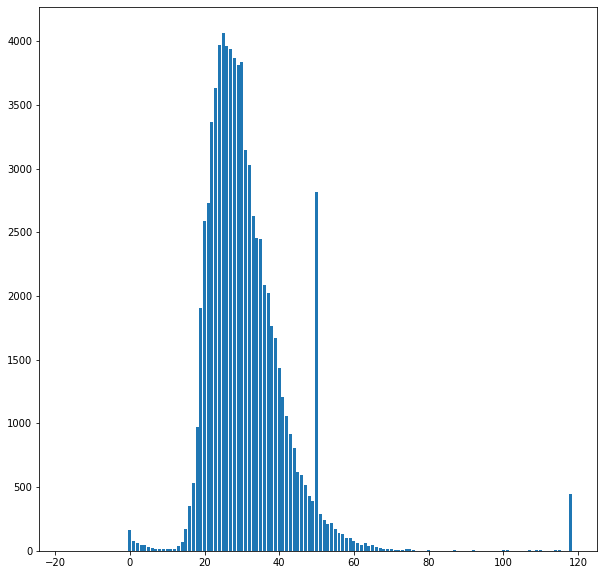

In [ ]:
z = users['age'].value_counts()
plt.figure(figsize=(10, 10))
plt.bar(users['age'].value_counts().index, users['age'].value_counts().values)

In [ ]:
users.age.value_counts()[118]

449

In [ ]:
2019-50

1969

Ternyata distribusinya ada yang aneh:
- Ada yang umurnya mendekati 0 malah makin tinggi
- Umur 50 jumlahnya banyak sendiri dan umur 118 juga banyak sendiri.

Nanti bisa dipikirin dah tu isinya apa dan kenapa dan harus bagaimana.

**Tambahan:** Cek distribusi kolom lain siapa tau nemu yg aneh

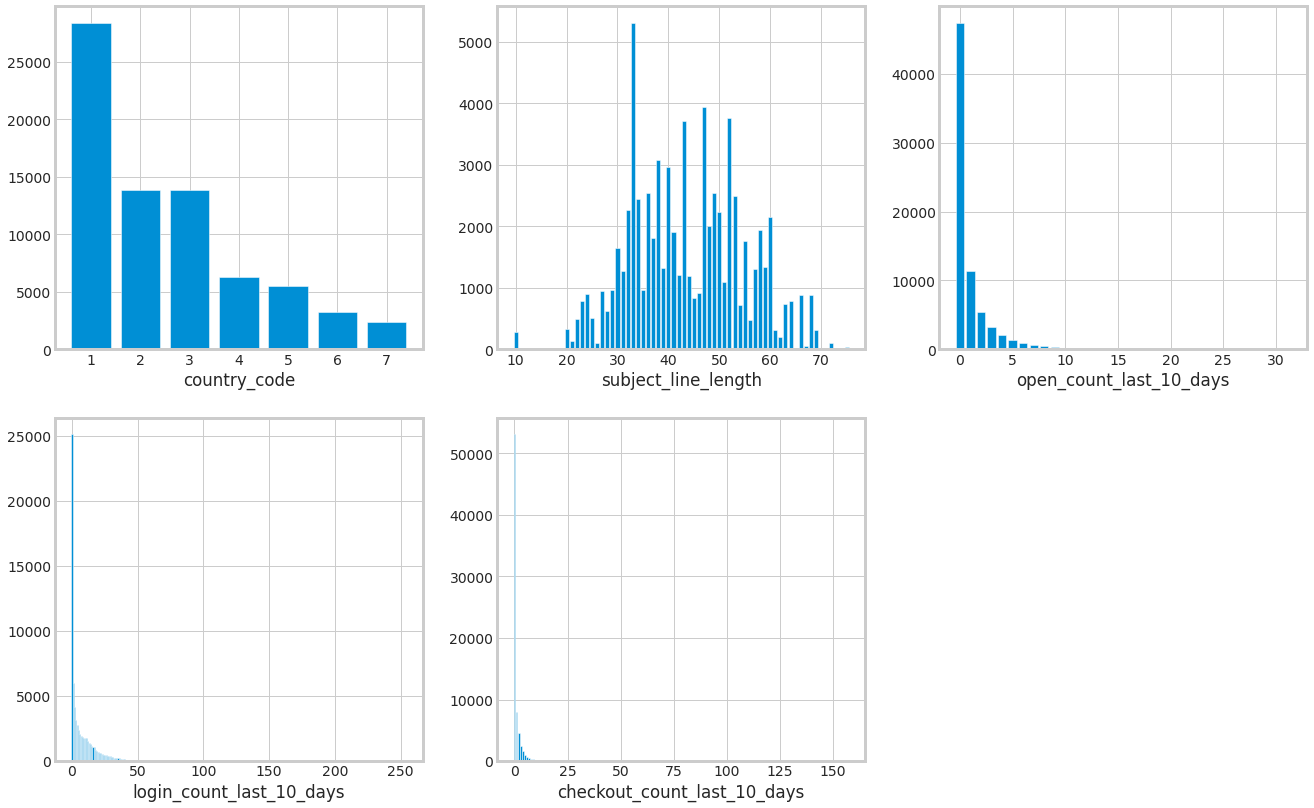

In [ ]:
# Cek distribusi tiap variabel
mpl.rcParams['figure.figsize'] = [20,20]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = mpl.gridspec.GridSpec(3,3)

var_to_plot = ['country_code', 'subject_line_length', 'open_count_last_10_days', 'login_count_last_10_days', 'checkout_count_last_10_days']

for i, var in enumerate(var_to_plot) :
    ax = plt.subplot(grid[i])
    z = train[var].value_counts()
    ax.bar(z.index, z.values)
    ax.set_xlabel(var)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


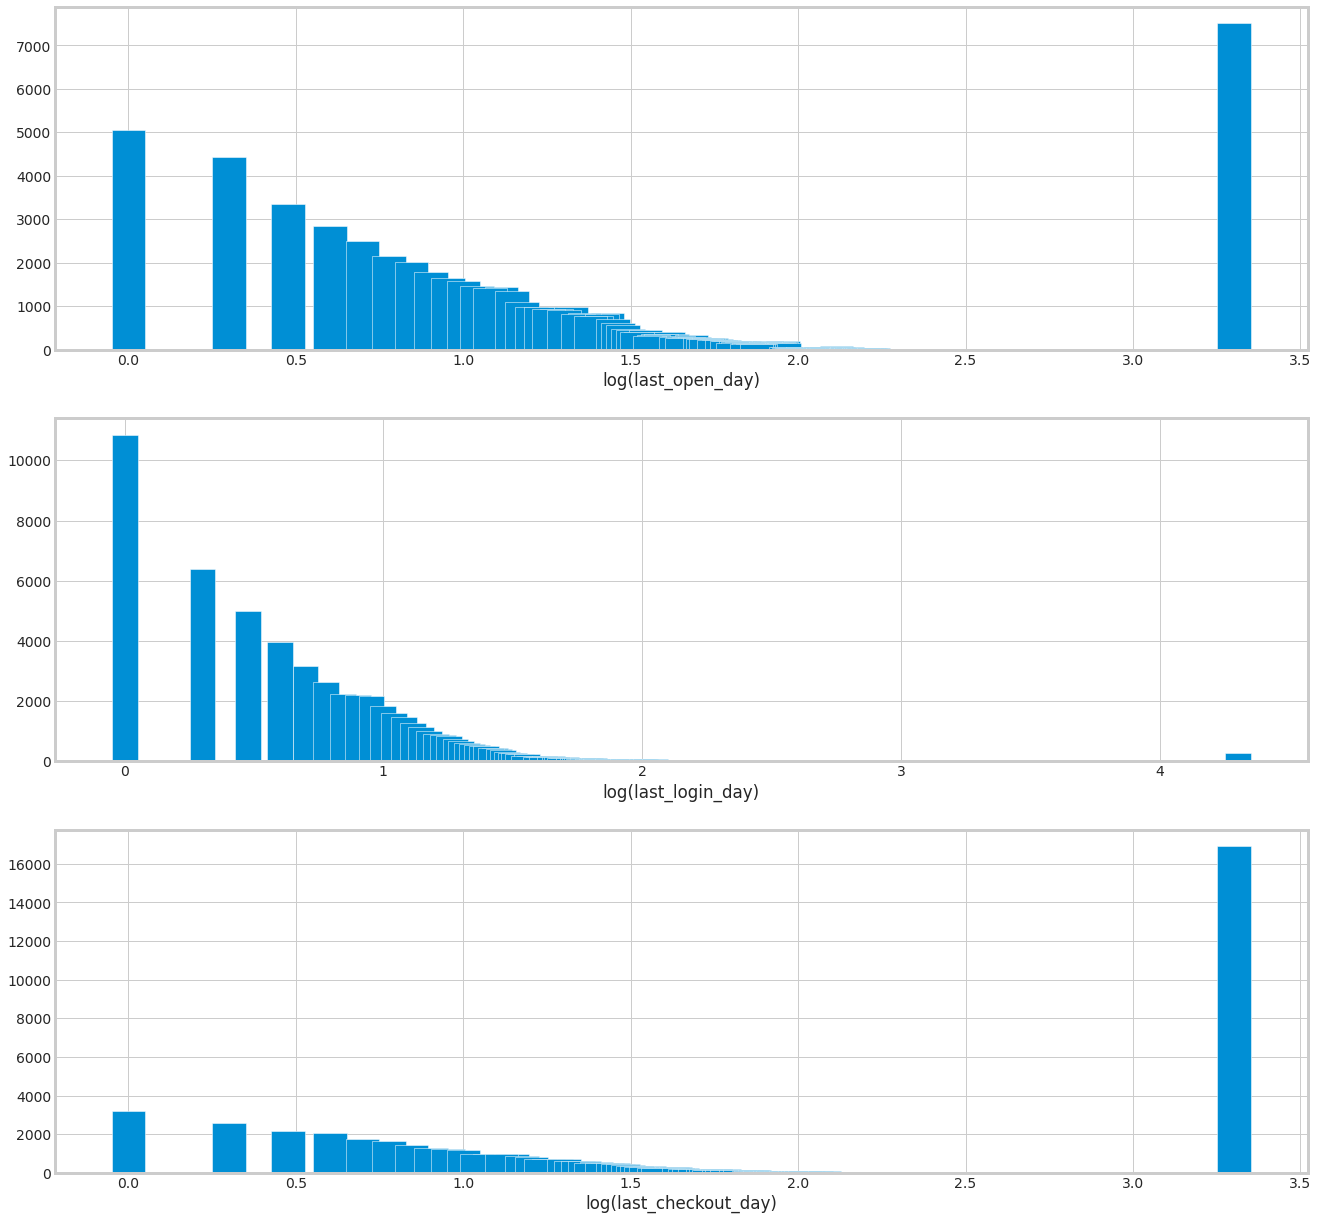

In [ ]:
# Cek distribusi tiap variabel (dalam skala log, soalnya kalo normal jauh banget ke kanannya)
mpl.rcParams['figure.figsize'] = [20,20]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = mpl.gridspec.GridSpec(3,1)

var_to_plot = ['last_open_day', 'last_login_day', 'last_checkout_day']

for i, var in enumerate(var_to_plot) :
    ax = plt.subplot(grid[i])
    z = np.log10(train[var]).value_counts()
    ax.bar(z.index, z.values, width=0.1)
    ax.set_xlabel("log({})".format(var))

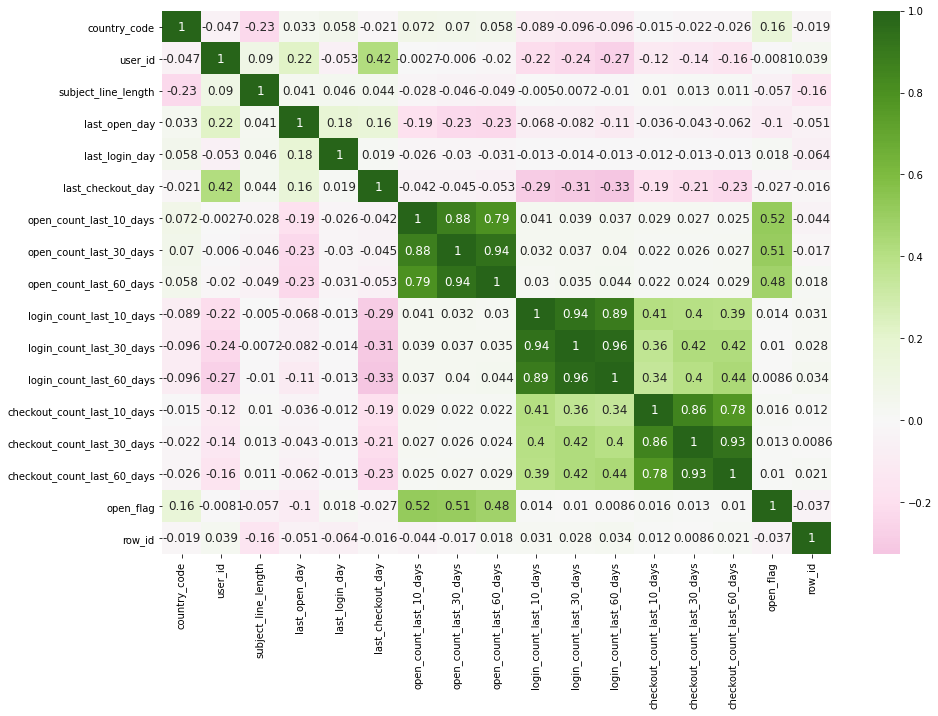

In [ ]:
# train_ready_corr = train.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(train.corr(), cmap='PiYG', annot=True, annot_kws={"size":12}, center=0)

In [ ]:
sns.pairplot(train, hue="open_flag")

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdb54079d08> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdb52f6d2f0> (for post_execute):


KeyboardInterrupt: ignored

###**2. Modelling**

In [ ]:
train1 = train[['country_code', 'subject_line_length', 'open_count_last_10_days', 'login_count_last_10_days', 'checkout_count_last_10_days', 'open_flag']]

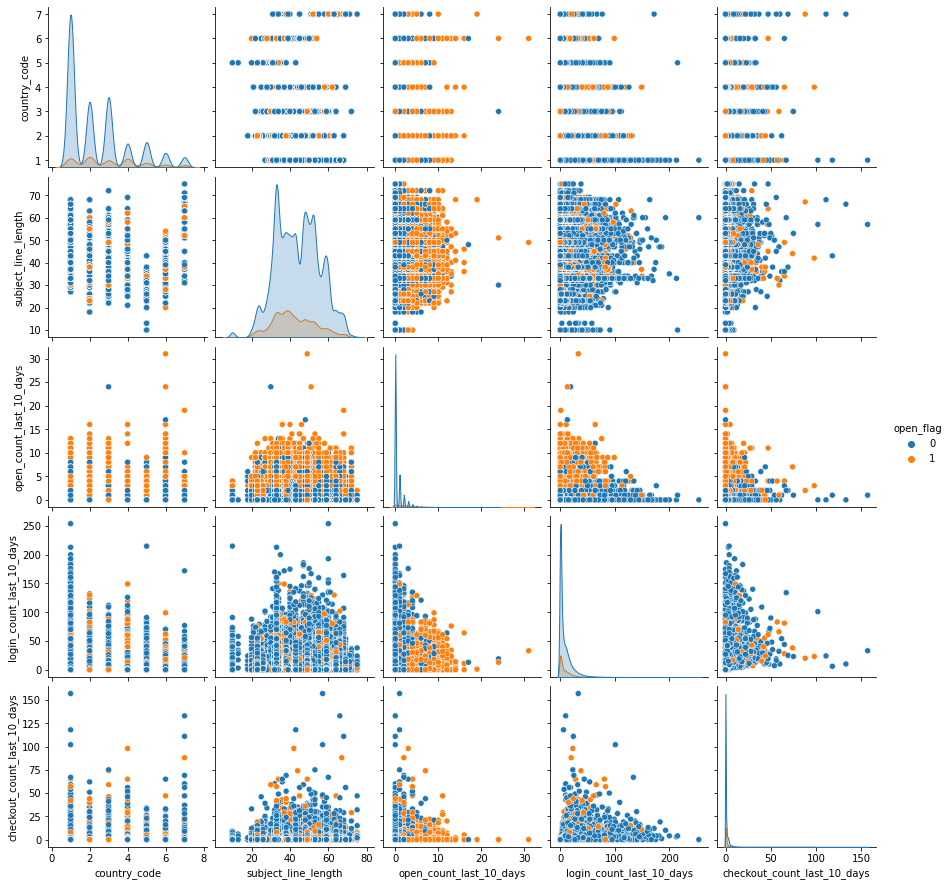

In [ ]:
sns.pairplot(train1, hue="open_flag")

In [ ]:
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02,127696,32,2000,20000,2000,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02,127807,38,5,34,2000,2,4,4,0,0,0,0,0,0,1,73537


In [ ]:
train.